<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme_cover.gif?raw=true  width='800'/>
</div>



---

<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/shanghai.png?raw=true width='400' />
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/ts_basis.png?raw=true width='800' />
</div>

👇👇👇点击可跳转！

[第三阶段：时间序列建模预测](#第三阶段：时间序列建模预测)

- [时间序列基础](#时间序列基础)
   - 1.1 [Decomposition](#Decomposition)
   - 1.2 [Stationarity](#Stationarity)
   - 1.3 [Transformation](#Transformation)

<div class="alert alert-block alert-danger">
<b>注意：</b>

- 需要翻墙才可下载数据和观看油管视频哦！
- 在线看HTML显示不全，请下载到本地操作哦！
- 记得解锁代码再去run哦！
    
</div>

<div class="alert alert-block alert-warning">
<b>【上海新冠疫情数据分析】项目日志</b>

第四阶段：【时间序列基础】
    
第四节阶段核心目的：学习并掌握时间序列分析基础！
1.1 Decomposition
1.2 Stationarity
1.3 Transformation
    
难度（最高5星）：⭐⭐⭐⭐

Good Luck!
</div>


# 第三阶段：时间序列建模预测

In [1]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

print(tf.__version__)

2.0.0


In [2]:
# IPython
from IPython.display import IFrame

## 时间序列基础

首先，欢迎大家来到最后一阶段的学习，这篇文章带大家来介绍，或者说回顾关于时间序列的一些理解，并带着大家尝试发现一些新的东西。

大概结构如下：

- Time series decomposition

    - Level
    - Trend
    - Seasonality
    - Noise
- Stationarity
    - AC and PAC plots
    - Rolling mean and std
    - Dickey-Fuller test
- Making our time series stationary
    - Difference transform
    - Log scale
    - Smoothing
    - Moving average

时间序列数据：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

横截面数据：

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

正在读取【横截面】数据......
读取完毕
正在读取【时间序列】数据......
读取完毕
正在获取并处理【上海】数据（数据来自上海卫健委）......
读取完毕


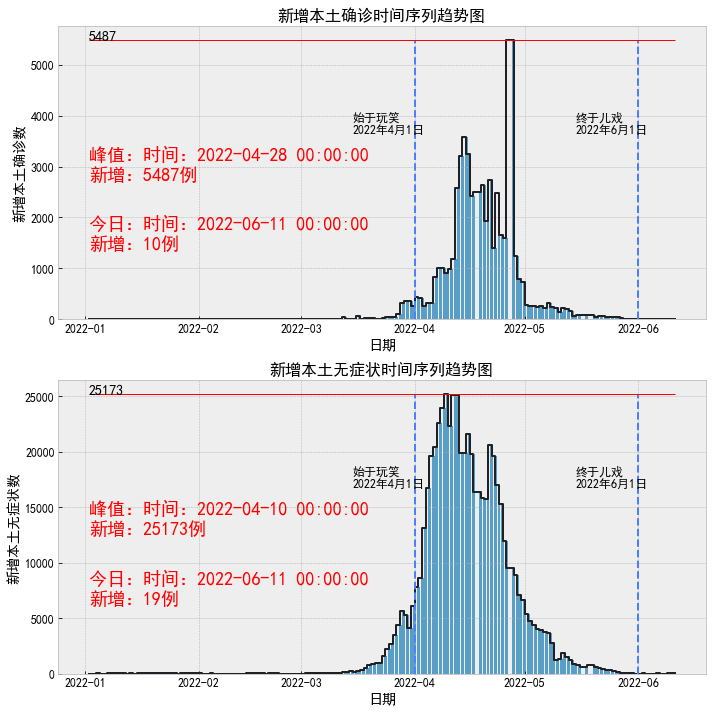

In [3]:
from getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(plot=True)  # 这里包含近10天的上海无症状新增趋势！

In [4]:
from data_processing import ts_process_CHINA,ts_process_US,daily_process

In [5]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [6]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [7]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/perfect.jpg?raw=true width='200' />
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/sep.gif?raw=true width='800' />
</div>

In [5]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/1VwHG6ceuz4")

In [8]:
ts_confirmed_CHINA_incre.head()

Hong Kong  Inner Mongolia  Beijing  Shanghai  Fujian  Guangdong  \
2020-01-22          0               0       14         9       1         26   
2020-01-23          2               0        8         7       4          6   
2020-01-24          0               1       14         4       5         21   
2020-01-25          3               6        5        13       8         25   
2020-01-26          3               0       27         7      17         33   

            Tianjin  Hunan  Anhui  Shandong  ...  Hubei  Henan  Heilongjiang  \
2020-01-22        4      4      1         2  ...    444      5             0   
2020-01-23        0      5      8         4  ...      0      0             2   
2020-01-24        4     15      6         9  ...    105      4             2   
2020-01-25        2     19     24        12  ...    212     23             5   
2020-01-26        4     26     21        19  ...    297     51             6   

            Hebei  Hainan  Guizhou  Guangxi  Gansu  Chongqing  Zhejiang  
2020-01-22      1       4        1        2      0          6        10  
2020-01-23      0       1        2        3      2          3        17  
2020-01-24      1       3        0       18      0         18        16  
2020-01-25      6      11        1        0      2         30        19  
2020-01-26      5       3        1       13      3         18        42  

[5 rows x 33 columns]

In [9]:
ts_confirmed_CHINA_incre.describe().T.sort_values('max',ascending=False)

count         mean          std    min  25%  50%   75%  \
                                                                         
Hong Kong       872.0  1397.202982  7488.092714  -23.0  3.0  8.0  57.0   
Hubei           872.0    78.439220   636.219554    0.0  0.0  0.0   0.0   
Shanghai        872.0    72.360092   395.425166 -589.0  2.0  4.0   9.0   
Jilin           872.0    46.207569   291.345419    0.0  0.0  0.0   0.0   
Fujian          872.0     3.815367    16.660219    0.0  0.0  1.0   3.0   
Shaanxi         872.0     3.766055    19.634498   -1.0  0.0  0.0   1.0   
Shandong        872.0     3.139908    16.344137    0.0  0.0  0.0   1.0   
Guangdong       872.0     8.408257    17.790742    0.0  1.0  3.0   7.0   
Zhejiang        872.0     3.599771    12.153691    0.0  0.0  0.0   1.0   
Henan           872.0     3.650229    13.332639    0.0  0.0  0.0   1.0   
Gansu           872.0     0.780963     4.668723    0.0  0.0  0.0   0.0   
Xinjiang        872.0     1.155963     7.099004    0.0  0.0  0.0   0.0   
Jiangxi         872.0     1.586009     8.353798   -5.0  0.0  0.0   0.0   
Inner Mongolia  872.0     2.291284     8.080821    0.0  0.0  0.0   1.0   
Hebei           872.0     2.299312     9.295807   -1.0  0.0  0.0   0.0   
Beijing         872.0     4.036697     9.833448   -1.0  0.0  0.0   2.0   
Tianjin         872.0     2.269495     6.990207    0.0  0.0  0.0   1.0   
Heilongjiang    872.0     3.423165     9.254834   -4.0  0.0  0.0   1.0   
Hunan           872.0     1.598624     7.736587    0.0  0.0  0.0   0.0   
Guangxi         872.0     1.891055     5.395990    0.0  0.0  0.0   1.0   
Anhui           872.0     1.221330     7.334103    0.0  0.0  0.0   0.0   
Liaoning        872.0     1.954128     6.622351   -1.0  0.0  0.0   1.0   
Jiangsu         872.0     2.563073     7.806686    0.0  0.0  0.0   1.0   
Chongqing       872.0     0.819954     4.287157    0.0  0.0  0.0   0.0   
Yunnan          872.0     2.473624     4.498934  -12.0  0.0  0.0   3.0   
Sichuan         872.0     2.701835     5.526730    0.0  0.0  1.0   3.0   
Shanxi          872.0     0.485092     1.844035    0.0  0.0  0.0   0.0   
Qinghai         872.0     0.168578     1.212364    0.0  0.0  0.0   0.0   
Hainan          872.0     0.330275     1.728029    0.0  0.0  0.0   0.0   
Guizhou         872.0     0.212156     1.312201   -1.0  0.0  0.0   0.0   
Ningxia         872.0     0.139908     0.688541    0.0  0.0  0.0   0.0   
Macau           872.0     0.095183     0.478108    0.0  0.0  0.0   0.0   
Tibet           872.0     0.001147     0.033864    0.0  0.0  0.0   0.0   

                    max  
                         
Hong Kong       76991.0  
Hubei           14840.0  
Shanghai         5489.0  
Jilin            4222.0  
Fujian            362.0  
Shaanxi           334.0  
Shandong          282.0  
Guangdong         139.0  
Zhejiang          132.0  
Henan             118.0  
Gansu             117.0  
Xinjiang          112.0  
Jiangxi            93.0  
Inner Mongolia     91.0  
Hebei              90.0  
Beijing            83.0  
Tianjin            80.0  
Heilongjiang       79.0  
Hunan              78.0  
Guangxi            77.0  
Anhui              74.0  
Liaoning           73.0  
Jiangsu            61.0  
Chongqing          53.0  
Yunnan             49.0  
Sichuan            49.0  
Shanxi             25.0  
Qinghai            21.0  
Hainan             21.0  
Guizhou            18.0  
Ningxia             6.0  
Macau               6.0  
Tibet               1.0

In [11]:
# pip install my-covid-report==1.8
from covid_report import getdata,data_processing,covid_visualization

In [12]:
covid_visualization.Decompose_CHINA(
    ts_confirmed_CHINA_incre,
    latest_data_CHINA,
    prev_data_CHINA,
    start='2022-03-15',
    ma = [3,7],
    method = '新增',              # method = '累计'
    specify = 'Shanghai',         # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = '确诊'
)

国家：中国
最新更新时间：2022-06-12 04:20:53
----------------------------------------TOTAL-----------------------------------------
截至目前【中国】累计确诊：1443237 | 新增确诊：985
截至目前【中国】累计死亡：14616 | 新增死亡：0
截至目前【Shanghai】累计确诊：63098 | 新增确诊：11
截至目前【Shanghai】累计死亡：595 | 新增死亡：0
----------------------------------------DETAIL----------------------------------------
蓝色为确诊数
红色为死亡数
--------------------------------------------------------------------------------------
省级行政区                     新增确诊数↓     新增死亡数      每10万人确诊人数  累计致死率     
Hong Kong                      851              0              16251.34          0.771%        
Inner Mongolia                 78               0              7.885             0.05%         
Beijing                        34               0              16.342            0.256%        
Shanghai                       11               0              260.305           0.943%        
Fujian                         6                0              8.442             0.03%         
Guangdong      

### Decomposition

Decomposition，是分解的意思，就是把一个时间序列，拆解成多个部分，可以分解成这四个分解属性：

- level
- trend
- seasonality
- noise

```diff
- 所有的时序数据都有level和noise，但是trend和seasonality不一定！
```

这4部分组合起来就形成了我们所说的时间序列。

那么应该怎么组合呢？

- Additive

```
y(t) = level + trend + seasonality + noise
```


Additive模型是线性的。趋势是线性的，季节性具有恒定的频率和幅度。随着时间的推移，变化是恒定的。

- Multiplicative 


```
y(t) = level * trend * seasonality * noise
```
Multiplicative模型是非线性的。趋势是非线性的，季节性不恒定。随着时间的推移，变化是不恒定的。

大多数时间序列是加法模型和乘法模型的组合，很难将现实世界的时间序列识别为一个单一的模型。

- Automatic time series decomposition

Statsmodel python 库提供了一个函数`seasonal_compose()`来自动分解时间序列，需要指定模型是加法还是乘法。

In [13]:
ts_shanghai_confirmed = ts_shanghai_covid['新增本土确诊']
ts_shanghai_asymptomatic = ts_shanghai_covid['新增本土无症状']

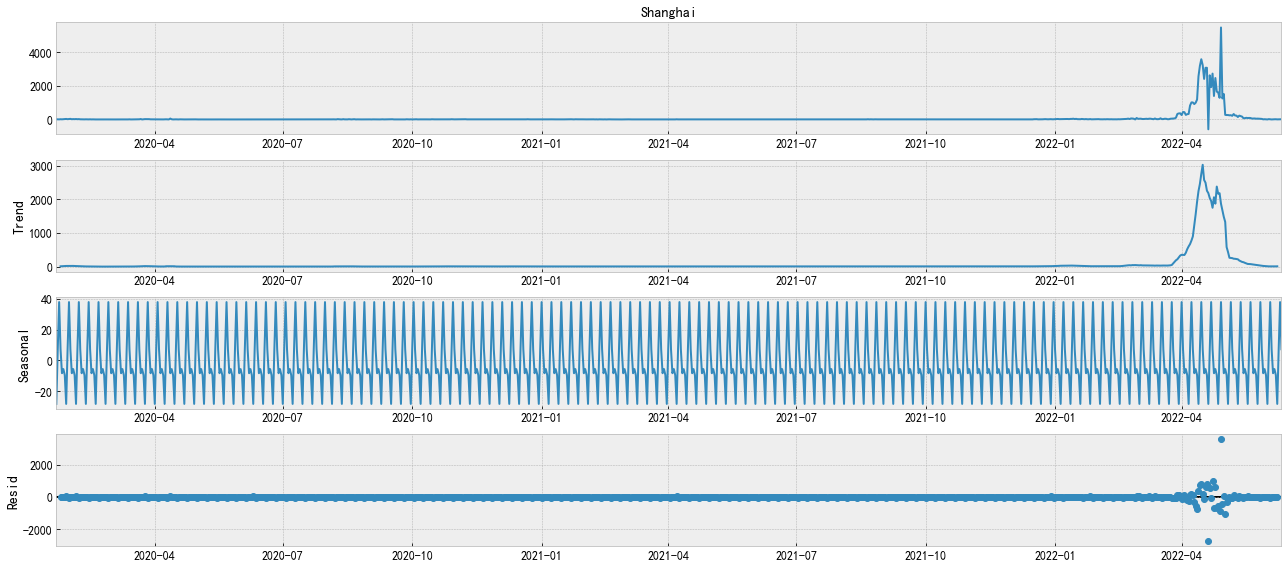

In [14]:
# 上海自2020年开始
series_2020 = ts_confirmed_CHINA_incre['Shanghai']
result = seasonal_decompose(series_2020, model='additive')
result.plot()
plt.show()

In [17]:
ts_confirmed_CHINA_incre['Shanghai']

2020-01-22     9
2020-01-23     7
2020-01-24     4
2020-01-25    13
2020-01-26     7
              ..
2022-06-07    12
2022-06-08     4
2022-06-09     8
2022-06-10    11
2022-06-11    11
Name: Shanghai, Length: 872, dtype: int64

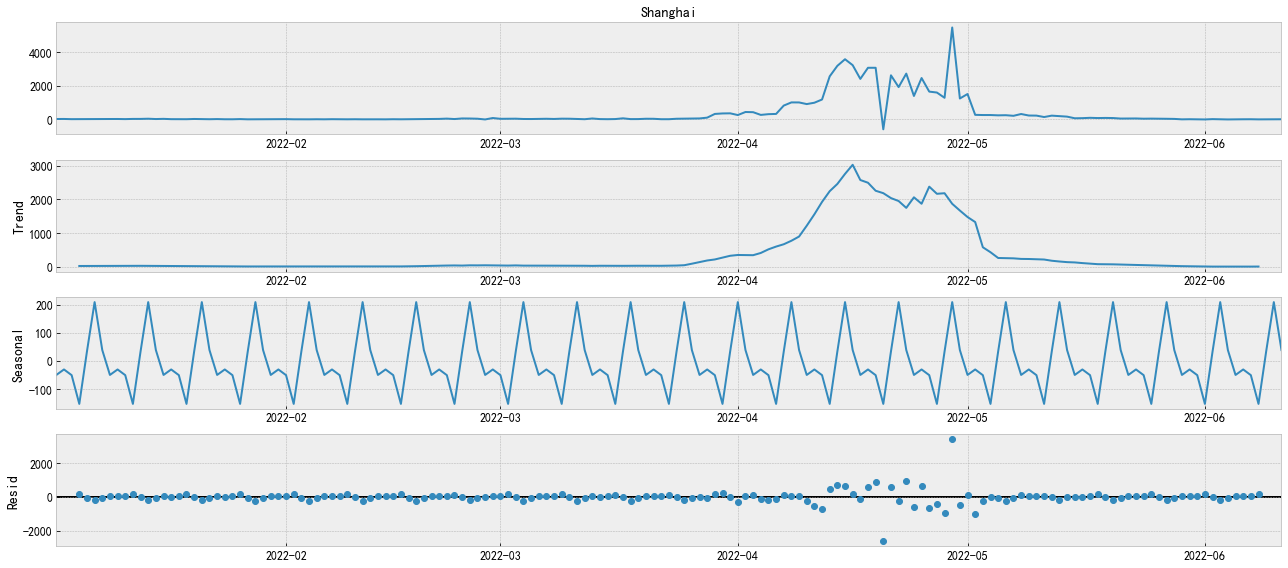

In [22]:
# 上海自2022年开始
series_2022 = ts_confirmed_CHINA_incre['Shanghai'][ts_confirmed_CHINA_incre['Shanghai'].index>'2022-01-01']
result = seasonal_decompose(series_2022, model='additive')
result.plot()
plt.show() 

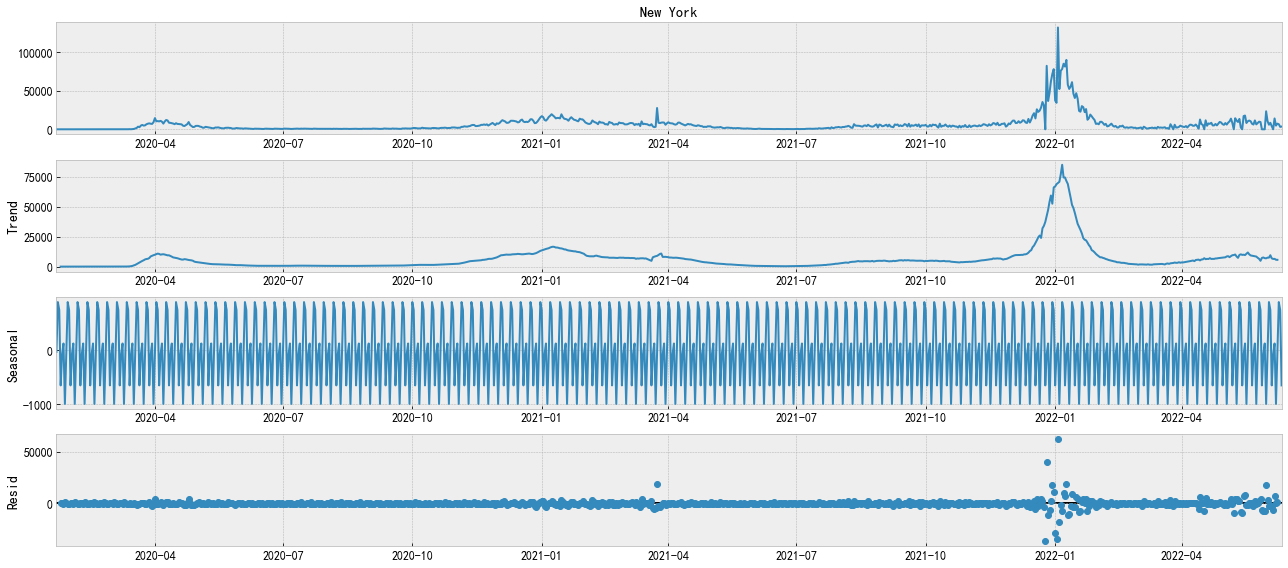

In [23]:
# 纽约
nyc_series = ts_confirmed_US_incre['New York']
nyc_result = seasonal_decompose(nyc_series, model='additive')
nyc_result.plot()
plt.show() 

#### level

level可以理解为 the mean of the series，在我们去除trend、seasonality和noise之后，剩下的就是level，也是我们真正要预测的东西，脱下一层层的外衣，要去预测的其实就是the mean of the series。

#### Trend

trend有一个长期的轨迹趋势，可以是正向或负向。

从最基本的折线图就可以看出是否存在趋势了，那么再介绍一些检测序列是否有trend的方法：

- Automatic decomposing
- Moving average
- linear regression

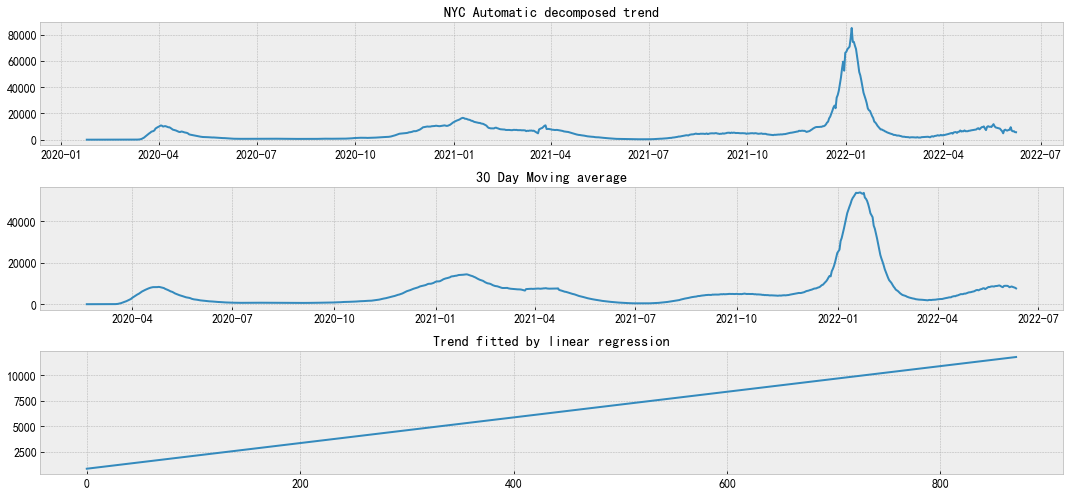

In [24]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(nyc_result.trend)
pm_ax.set_title("NYC Automatic decomposed trend")
 
mm = nyc_series.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("30 Day Moving average")


X = [i for i in range(0, len(nyc_series))]
X = np.reshape(X, (len(X), 1))
y = nyc_series
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()

可以看出纽约的新增确诊趋势不清晰，没有一个明确的线性关系。好像里面包含着不少的seasonality和noise。

#### Seasonality

当由于季节性因素在定期间隔之间观察到明显的重复模式时，就会观察到季节性。这可能是因为一年中的月份、月份中的某一天、工作日甚至一天中的时间。比如冰激凌的销量（冬天总是低，夏天总是高）。

一般，我们在长序列中发现seasonality不是很清楚的时候，一般会拆解为更小的序列，再去比较各part的seasonality。

Text(0, 0.5, '2022')

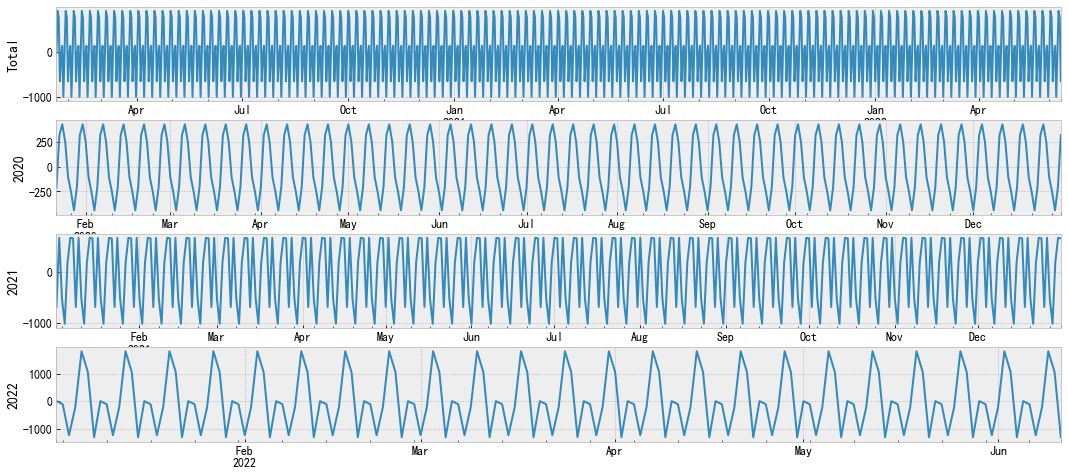

In [25]:
plt.subplot(411)
nyc_series = ts_confirmed_US_incre['New York']
nyc_result = seasonal_decompose(nyc_series, model='additive')
nyc_result.seasonal.plot()
plt.ylabel('Total')
plt.subplot(412)
nyc_series_2020 = ts_confirmed_US_incre['New York'][ts_confirmed_US_incre.index<'2021']
nyc_result_2020 = seasonal_decompose(nyc_series_2020, model='additive')
nyc_result_2020.seasonal.plot()
plt.ylabel('2020')
plt.subplot(413)
nyc_series_2021 = ts_confirmed_US_incre['New York'][(ts_confirmed_US_incre.index>'2021') &(ts_confirmed_US_incre.index<'2022')]
nyc_result_2021 = seasonal_decompose(nyc_series_2021, model='additive')
nyc_result_2021.seasonal.plot()
plt.ylabel('2021')
plt.subplot(414)
nyc_series_2022 = ts_confirmed_US_incre['New York'][ts_confirmed_US_incre.index>'2022']
nyc_result_2022 = seasonal_decompose(nyc_series_2022, model='additive')
nyc_result_2022.seasonal.plot()
plt.ylabel('2022')

可以看出每个月有4个spike，就是高点的意思。但是2021、2022年貌似更频繁一些，一个月有8个spike。

#### Noise

这里的噪声，可以理解为白噪声，也就是完全的随机。

如果时序数据有白噪声，说明我们不能做时序的预测。

如何检测？

- 查看分布，是否像高斯分布，均值为0，方差稳定
- ACF
- mean是否随时间变化

Text(0.5, 1.0, 'Mean over time')

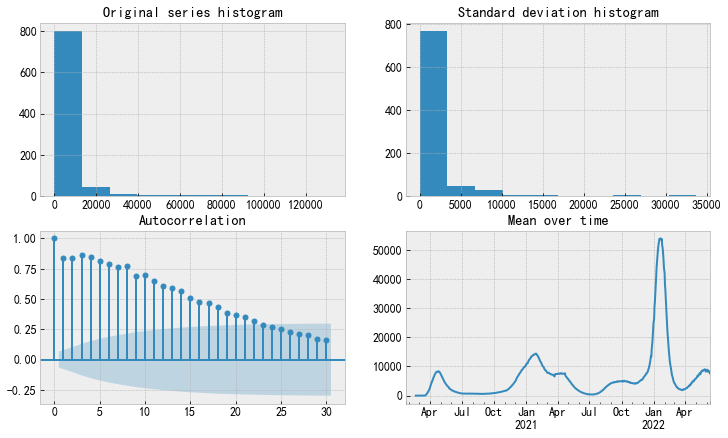

In [26]:
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

nyc_series.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

plot_acf(nyc_series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = nyc_series.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = nyc_series.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

很明显，我们的时序数据不服从高斯分布，并且自相关系数也没在蓝色阴影区间内，说名不含白噪声。

In [4]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/dKxMd2U4RwQ")

### Stationarity

> A stationary time seris means that its properties do not change with time.

均值方差是恒定的，协方差不随着时间改变而改变。

大部分的模型都喜欢稳态序列，所以我们可以把序列转换成stationary。

如何检测？

#### ACF and PACF

大家都对correlation比较熟悉吧，描述的是变量之间的线性相关程度，那么autocorrelation怎么去理解呢?

可以理解为同一变量，固定时间间隔分解的数据之间的相关程度。

> If the data would be non-stationary the autocorrelation values will be highly correlated with distant points in time showing possible seasonalities or trends.

> Stationary series autocorrelation values will quickly decrease over time t. This shows us that no information is carried over time and then the series should be constant over time.

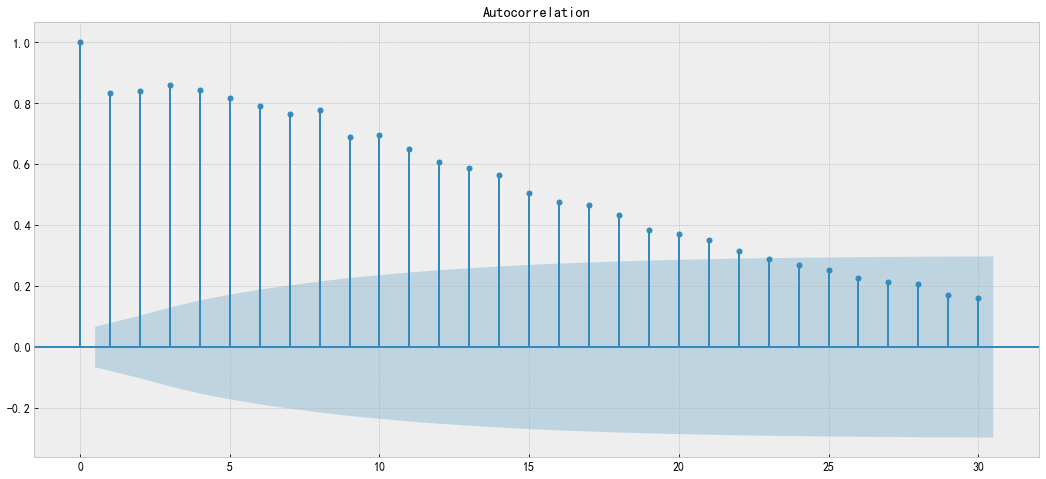

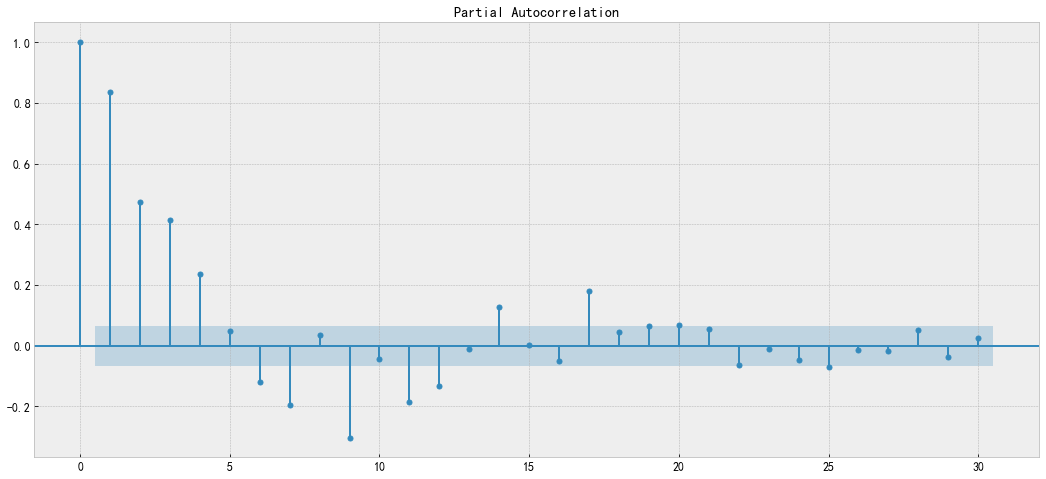

In [27]:
plot_acf(nyc_series, lags=30)
plot_pacf(nyc_series, lags=30)
plt.show()

ACF并没有很快降到0，所以不是stationary。

#### Rolling means and standard deviation

第二个就是检查mean和std是否不随时间变化而变化，如果是这样，那就是stationary。

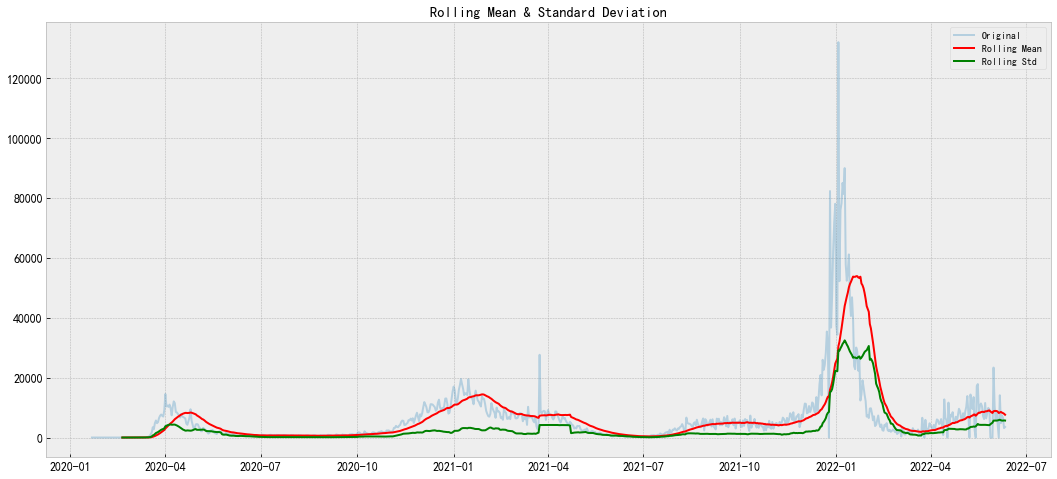

In [28]:
rolmean = nyc_series.rolling(window=30).mean()
rolstd = nyc_series.rolling(window=30).std()

# Plot rolling statistics:
orig = plt.plot(nyc_series, label='Original',alpha = .3)
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

很明显，均值和标准差并不是随着时间恒定不变的，所以，这不是stationary的。

#### Augmented Dickey-Fuller test

但是光看图显然不是个很好的方法，眼睛往往具有欺骗性，我们需要一个 robust formal method 去检验序列是否是 stationary 的。

这里就引入了**ADF检验**，下面是其介绍。

Augmented Dickey-Fuller 检验是一种称为单位根检验的统计检验。单位根检验背后的直觉是，它决定了趋势定义时间序列的强度。有许多单位根检验，而 Augmented Dickey-Fuller 可能是使用更广泛的一种。它使用自回归模型并跨多个不同的滞后值优化信息标准。

检验的零假设是时间序列可以用单位根表示，它不是平稳的（具有一些时间相关的结构）。另一种假设（拒绝原假设）是时间序列是平稳的。

零假设（H0）：如果没有被拒绝，则表明时间序列有单位根，意味着它是非平稳的。它有一些时间相关的结构。替代假设（H1）：拒绝原假设；它表明时间序列没有单位根，这意味着它是平稳的。它没有时间依赖的结构。我们使用来自测试的 p 值来解释这个结果。低于阈值（例如 5% 或 1%）的 p 值表明我们拒绝原假设（平稳），否则高于阈值的 p 值表明我们未能拒绝原假设（非平稳）。

p 值 > 0.05：无法拒绝原假设 (H0)，数据具有单位根且非平稳。 p-value <= 0.05：拒绝原假设（H0），数据没有单位根并且是平稳的。下面是在 Daily Female Births 数据集上计算 Augmented Dickey-Fuller 检验的示例。 statsmodels 库提供了实现测试的 adfuller() 函数。|

In [2]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/1opjnegd_hA")

In [29]:
X = nyc_series
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.538752
p-value: 0.007046
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


可以看到 p-value: 0.007040 是小于 0.05的，所以拒绝原假设H0，意味着序列是平稳的。

下面，我们把之前的分析合并成一个函数！

ADF检验结果：We reject H0 and the series is stationary
ADF检验所得P值：0.007046


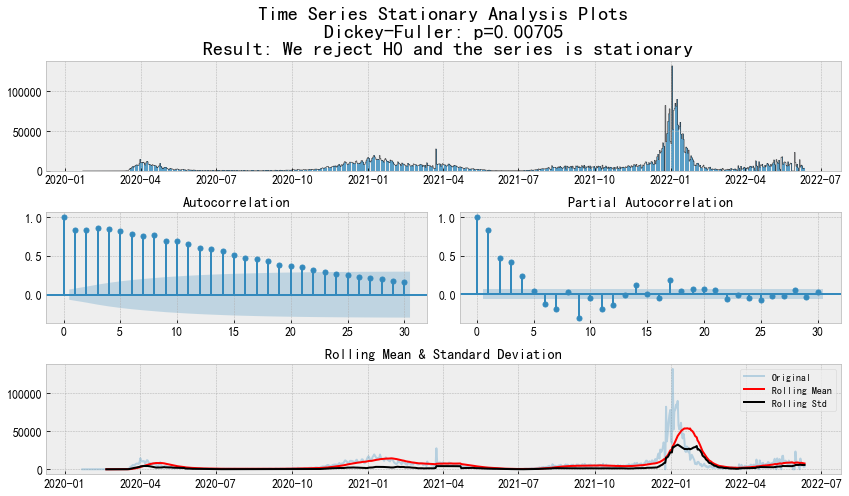

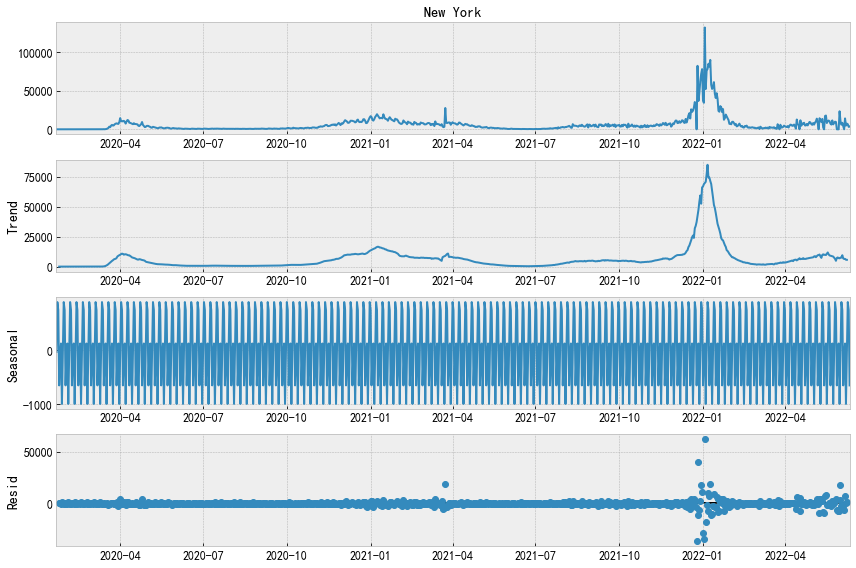

In [30]:
def tsplot(y, lags=None, figsize=(12, 7), ma = 30, decompose = True):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        #y.plot.area(ax=ts_ax)
        ts_ax.step(y.index,y,color = '#202124',linewidth = .5)
        ts_ax.bar(y.index,y,alpha = .8)
        
        p_value = sm.tsa.stattools.adfuller(y)[1]
        hypothesis_result = "We reject H0 and the series is stationary" if p_value <= 0.05 else "We can not reject H0 and the series is NOT stationary"
        ts_ax.set_title(
            'Time Series Stationary Analysis Plots\n Dickey-Fuller: p={0:.5f} \n Result: {1}'.format(p_value, hypothesis_result),
        fontsize = 20)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = y.rolling(window=ma).mean()
        rolstd = y.rolling(window=ma).std()

        # Plot rolling statistics:
        orig = plt.plot(y, label='Original',alpha = .3)
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        print(f"ADF检验结果：{Fore.RED}{hypothesis_result}{Style.RESET_ALL}")
        print(f"ADF检验所得P值：{Fore.BLUE}{round(p_value,6)}{Style.RESET_ALL}")
    if decompose:
        plt.rcParams["figure.figsize"] = (12,8)
        result = seasonal_decompose(y, model='additive')
        result.plot()
        plt.show() 

tsplot(nyc_series, lags=30)

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 思考：

例子使用的是纽约的数据，请尝试使用【上海】的数据，并告诉我，上海的新增确诊时序数据是平稳的么？
</div>

### Transformation

那么如果不是平稳的，我们应该怎么把它变成平稳的呢？

这里我们使用经典的数据集`airline-passengers.csv`，它不是平稳的，这里我们要把它变为平稳的序列。

In [3]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/bP1fbXd_XSk")

In [31]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
passengers = pd.read_csv(url)

Text(0.5, 1.0, 'Original vs Windowed mean vs Windowed std')

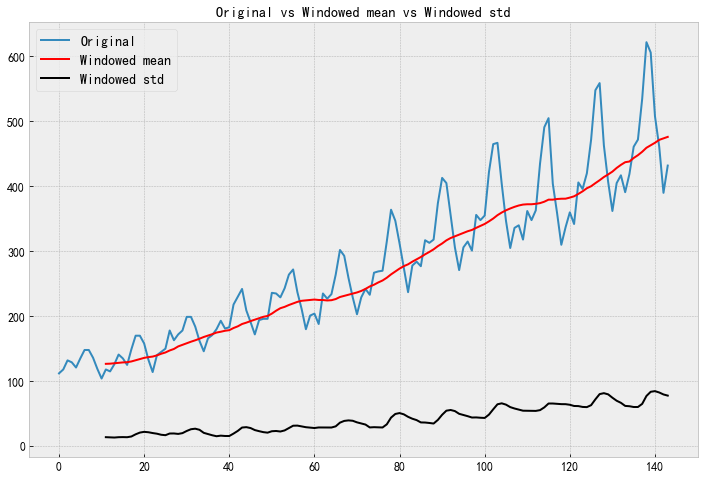

In [33]:
passengers.Passengers.plot(label='Original')
passengers.Passengers.rolling(window=12).mean().plot(
    color='red', label='Windowed mean')
passengers.Passengers.rolling(window=12).std().plot(
    color='black', label='Windowed std')
plt.legend(fontsize = 14)
plt.title('Original vs Windowed mean vs Windowed std')

ADF检验结果：We can not reject H0 and the series is NOT stationary
ADF检验所得P值：0.99188


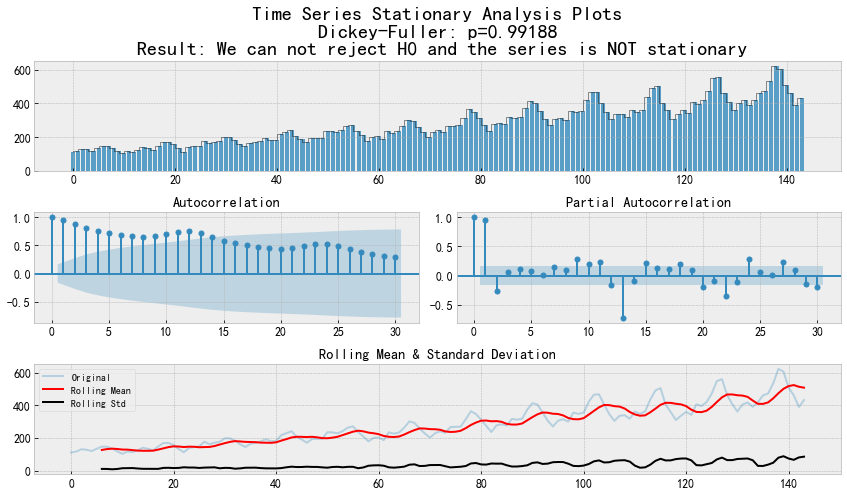

In [35]:
tsplot(passengers.Passengers, lags=30, ma = 7, decompose=False)

P值远大于0.05，所以不是平稳的。

#### Differencing

> Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

`difference(t) = observation(t) - observation(t-1)`

In [36]:
def difference(dataset, interval=1, order=1):
    for u in range(order):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        dataset = diff
    return diff

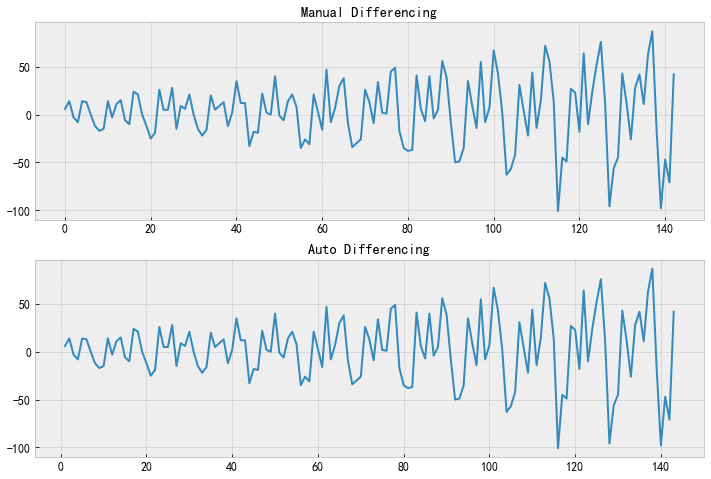

In [37]:
plt.subplot(211)
plt.title('Manual Differencing')
plt.plot(difference(passengers.Passengers))
plt.subplot(212)
plt.title('Auto Differencing')
plt.plot(passengers.Passengers.diff())

如果trend和seasonality一次去干净，那么我们可以反复使用diff()。

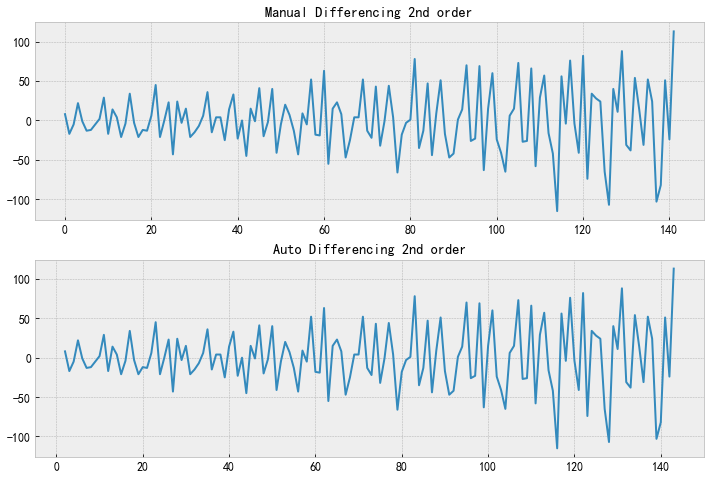

In [38]:
plt.subplot(211)
plt.title('Manual Differencing 2nd order')
plt.plot(difference(passengers.Passengers,order = 2))
plt.subplot(212)
plt.title('Auto Differencing 2nd order')
plt.plot(passengers.Passengers.diff().diff())

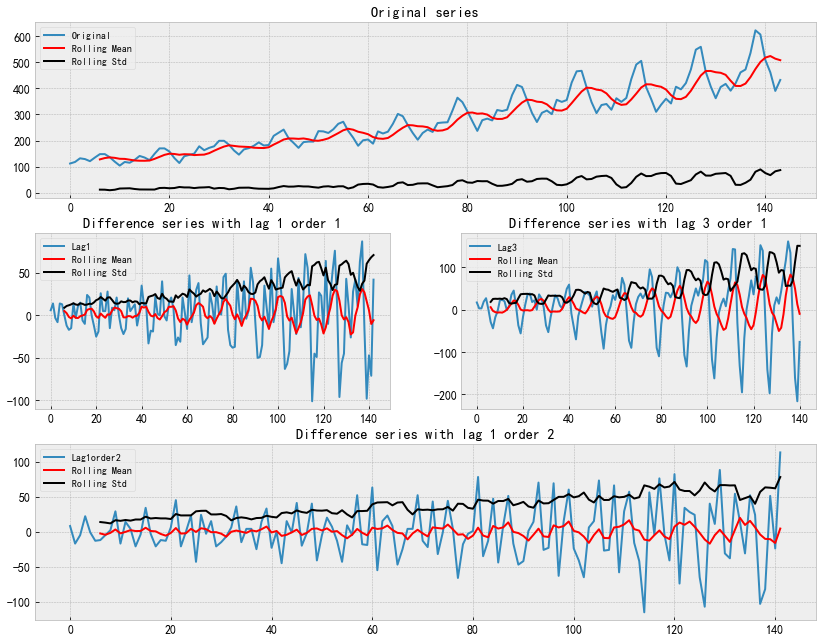

In [39]:
lag1series = pd.Series(difference(passengers.Passengers, interval=1, order=1))
lag3series = pd.Series(difference(passengers.Passengers, interval=3, order=1))
lag1order2series = pd.Series(difference(
    passengers.Passengers, interval=1, order=2))

fig = plt.figure(figsize=(14, 11))
layout = (3, 2)
original = plt.subplot2grid(layout, (0, 0), colspan=2)
lag1 = plt.subplot2grid(layout, (1, 0))
lag3 = plt.subplot2grid(layout, (1, 1))
lag1order2 = plt.subplot2grid(layout, (2, 0), colspan=2)

original.set_title('Original series')
original.plot(passengers.Passengers, label='Original')
original.plot(passengers.Passengers.rolling(
    7).mean(), color='red', label='Rolling Mean')
original.plot(passengers.Passengers.rolling(7).std(),
              color='black', label='Rolling Std')
original.legend(loc='best')

lag1.set_title('Difference series with lag 1 order 1')
lag1.plot(lag1series, label="Lag1")
lag1.plot(lag1series.rolling(7).mean(), color='red', label='Rolling Mean')
lag1.plot(lag1series.rolling(7).std(), color='black', label='Rolling Std')
lag1.legend(loc='best')

lag3.set_title('Difference series with lag 3 order 1')
lag3.plot(lag3series, label="Lag3")
lag3.plot(lag3series.rolling(7).mean(), color='red', label='Rolling Mean')
lag3.plot(lag3series.rolling(7).std(), color='black', label='Rolling Std')
lag3.legend(loc='best')

lag1order2.set_title('Difference series with lag 1 order 2')
lag1order2.plot(lag1order2series, label="Lag1order2")
lag1order2.plot(lag1order2series.rolling(7).mean(),
                color='red', label='Rolling Mean')
lag1order2.plot(lag1order2series.rolling(7).std(),
                color='black', label='Rolling Std')
lag1order2.legend(loc='best')

#### Log / Sqrt / Pct scale transformation

- np.log()
- np.sqrt()
- df.shift(1)/df



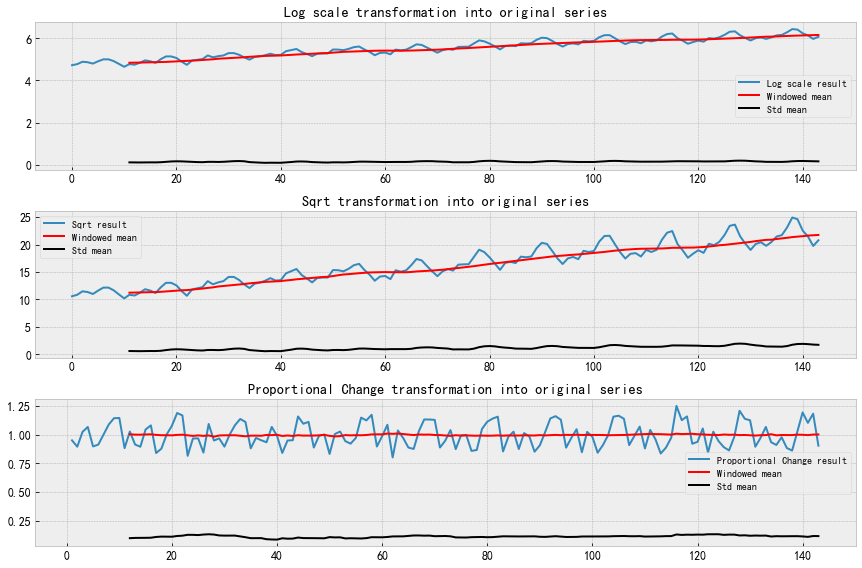

In [40]:
plt.subplot(311)
ts_log = np.log(passengers.Passengers)
ts_log.plot(label='Log scale result')
ts_log.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_log.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Log scale transformation into original series')


plt.subplot(312)
ts_sqrt = np.sqrt(passengers.Passengers)
ts_sqrt.plot(label='Sqrt result')
ts_sqrt.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_sqrt.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Sqrt transformation into original series')

plt.subplot(313)
ts_pct = passengers.Passengers.shift(1)/passengers.Passengers
ts_pct.plot(label='Proportional Change result')
ts_pct.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_pct.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Proportional Change transformation into original series')

plt.tight_layout()

#### Smoothing

移动平均就是一个很常见的Smoothing方法，我们也可以用于移除Seasonality。

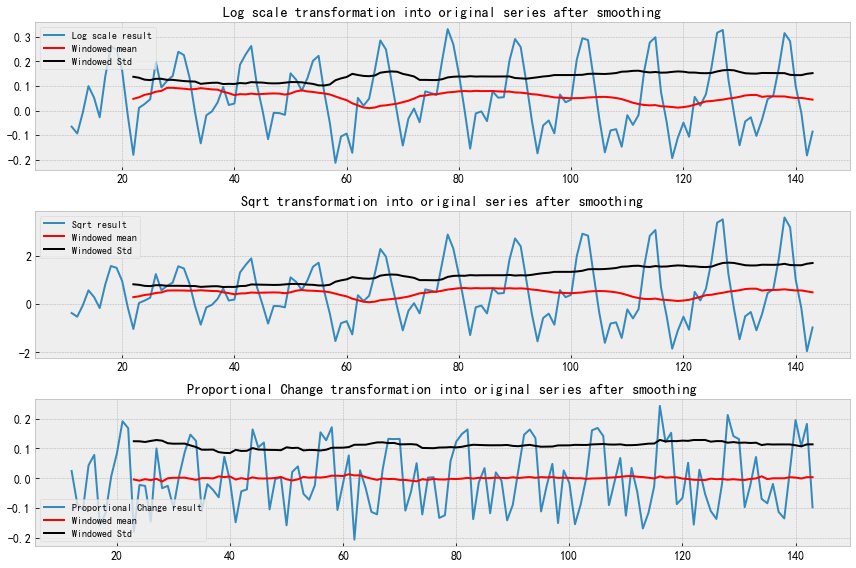

In [42]:
plt.subplot(311)
ts_log = np.log(passengers.Passengers)
ts_log = ts_log - pd.Series(ts_log).rolling(12).mean()
ts_log.plot(label='Log scale result')
ts_log.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_log.rolling(window=12).std().plot(color='black', label='Windowed Std')
plt.legend()
plt.title('Log scale transformation into original series after smoothing')


plt.subplot(312)
ts_sqrt = np.sqrt(passengers.Passengers)
ts_sqrt = ts_sqrt - pd.Series(ts_sqrt).rolling(12).mean()
ts_sqrt.plot(label='Sqrt result')
ts_sqrt.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_sqrt.rolling(window=12).std().plot(color='black', label='Windowed Std')
plt.legend()
plt.title('Sqrt transformation into original series after smoothing')

plt.subplot(313)
ts_pct = passengers.Passengers.shift(1)/passengers.Passengers
ts_pct = ts_pct - pd.Series(ts_pct).rolling(12).mean()
ts_pct.plot(label='Proportional Change result')
ts_pct.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_pct.rolling(window=12).std().plot(color='black', label='Windowed Std')
plt.legend()
plt.title('Proportional Change transformation into original series after smoothing')

plt.tight_layout()

点击图片有惊喜哦👇👇👇

<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme.gif?raw=true width='400' />
</div>

<div align=center>
<a href='https://www.xiaohongshu.com/user/profile/6180a092000000001f03501c?xhsshare=CopyLink&appuid=6180a092000000001f03501c&apptime=1650313282'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme_xhs.gif?raw=true width = 400/>
</div>